# Import Required Libraries
Import the necessary libraries, including OpenCV and NumPy.

In [1]:
# Import Required Libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load Images
Load the two images that will be used for feature matching.

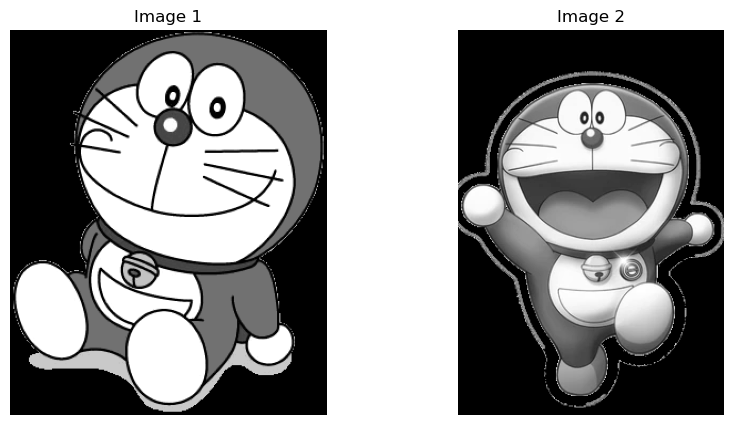

In [2]:
# Load Images
image1 = cv2.imread('images/same1.png', cv2.IMREAD_GRAYSCALE)  # Load the first image in grayscale
image2 = cv2.imread('images/same2.png', cv2.IMREAD_GRAYSCALE)  # Load the second image in grayscale

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Image 1')
plt.imshow(image1, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Image 2')
plt.imshow(image2, cmap='gray')
plt.axis('off')

plt.show()

# Detect Keypoints using Harris Corner Detector
Use the Harris corner detector to detect keypoints in both images.

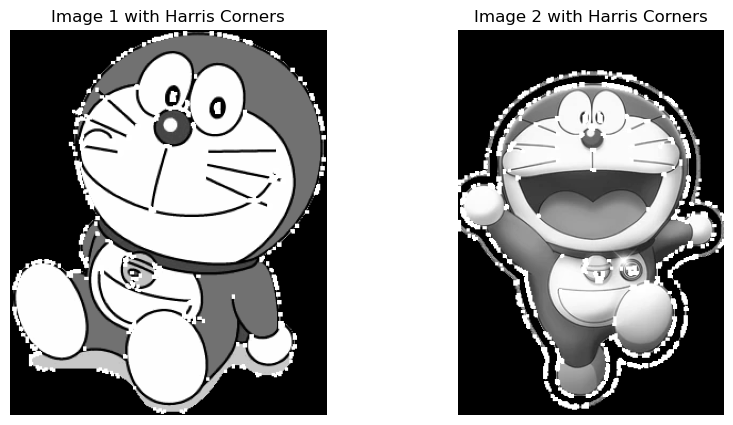

In [3]:
# Detect Keypoints using Harris Corner Detector

# Detect Harris corners in the first image
harris_corners1 = cv2.cornerHarris(image1, blockSize=2, ksize=3, k=0.04)
harris_corners1 = cv2.dilate(harris_corners1, None)  # Dilate to mark the corners

# Detect Harris corners in the second image
harris_corners2 = cv2.cornerHarris(image2, blockSize=2, ksize=3, k=0.04)
harris_corners2 = cv2.dilate(harris_corners2, None)  # Dilate to mark the corners

# Threshold to get the keypoints
image1[harris_corners1 > 0.01 * harris_corners1.max()] = 255
image2[harris_corners2 > 0.01 * harris_corners2.max()] = 255

# Display the images with detected keypoints
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Image 1 with Harris Corners')
plt.imshow(image1, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Image 2 with Harris Corners')
plt.imshow(image2, cmap='gray')
plt.axis('off')

plt.show()

# Extract SIFT Descriptors
Use the SIFT algorithm to extract descriptors from the detected keypoints.

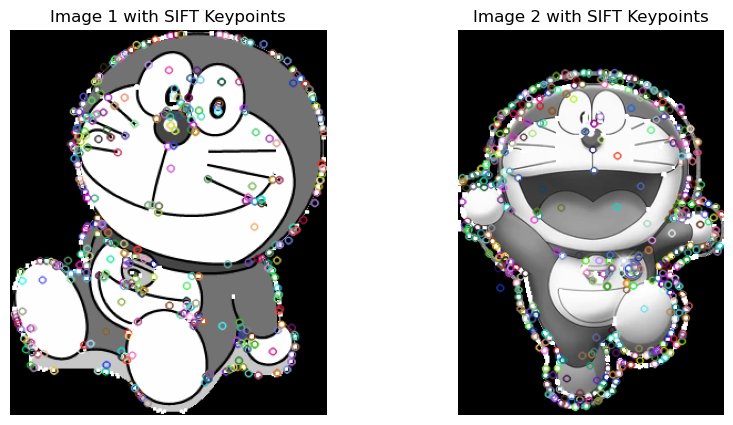

In [4]:
# Extract SIFT Descriptors

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors for the first image
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)

# Detect keypoints and compute descriptors for the second image
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Draw keypoints on the images
image1_with_keypoints = cv2.drawKeypoints(image1, keypoints1, None)
image2_with_keypoints = cv2.drawKeypoints(image2, keypoints2, None)

# Display the images with keypoints
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Image 1 with SIFT Keypoints')
plt.imshow(image1_with_keypoints, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Image 2 with SIFT Keypoints')
plt.imshow(image2_with_keypoints, cmap='gray')
plt.axis('off')

plt.show()

# Match Keypoints
Match the keypoints between the two images using their SIFT descriptors.

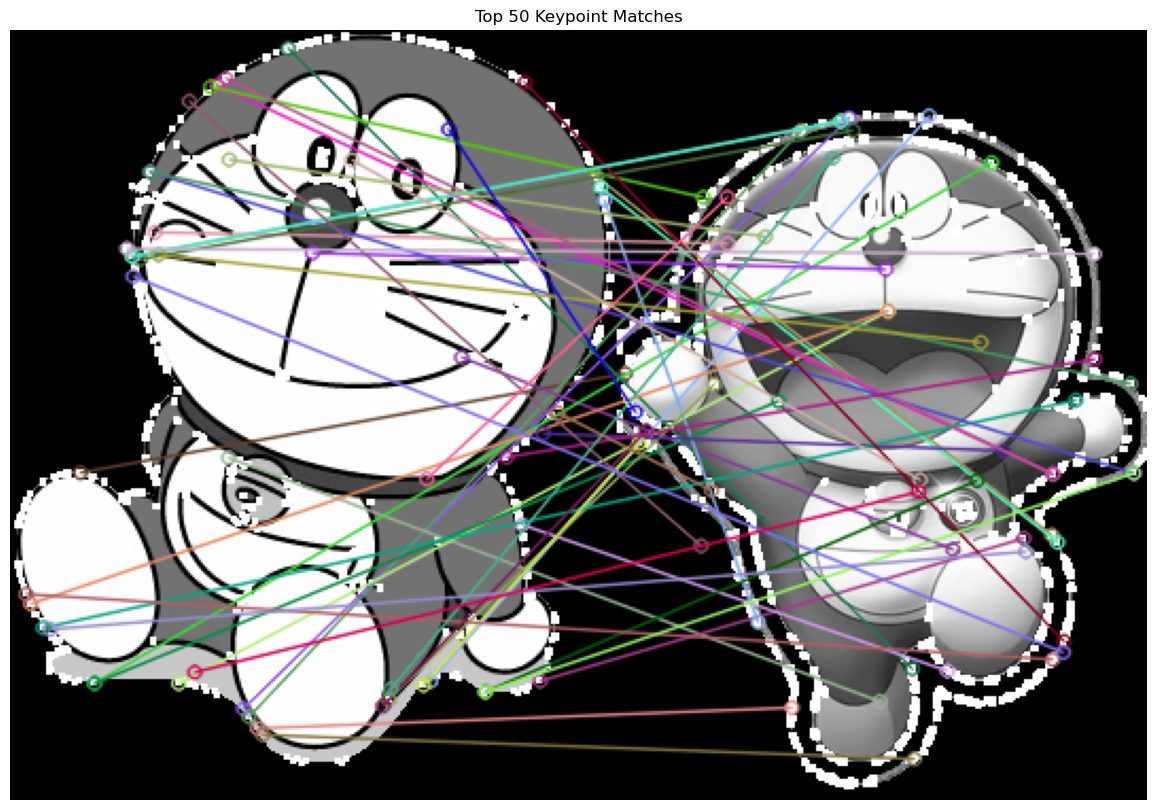

In [5]:
# Match Keypoints

# Use BFMatcher to match descriptors
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw the top matches
image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.figure(figsize=(15, 10))
plt.title('Top 50 Keypoint Matches')
plt.imshow(image_matches)
plt.axis('off')
plt.show()

# Apply RANSAC for Feature Matching
Use the RANSAC algorithm to filter out outliers and find the best matches between the keypoints.

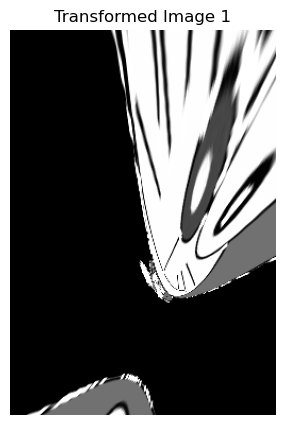

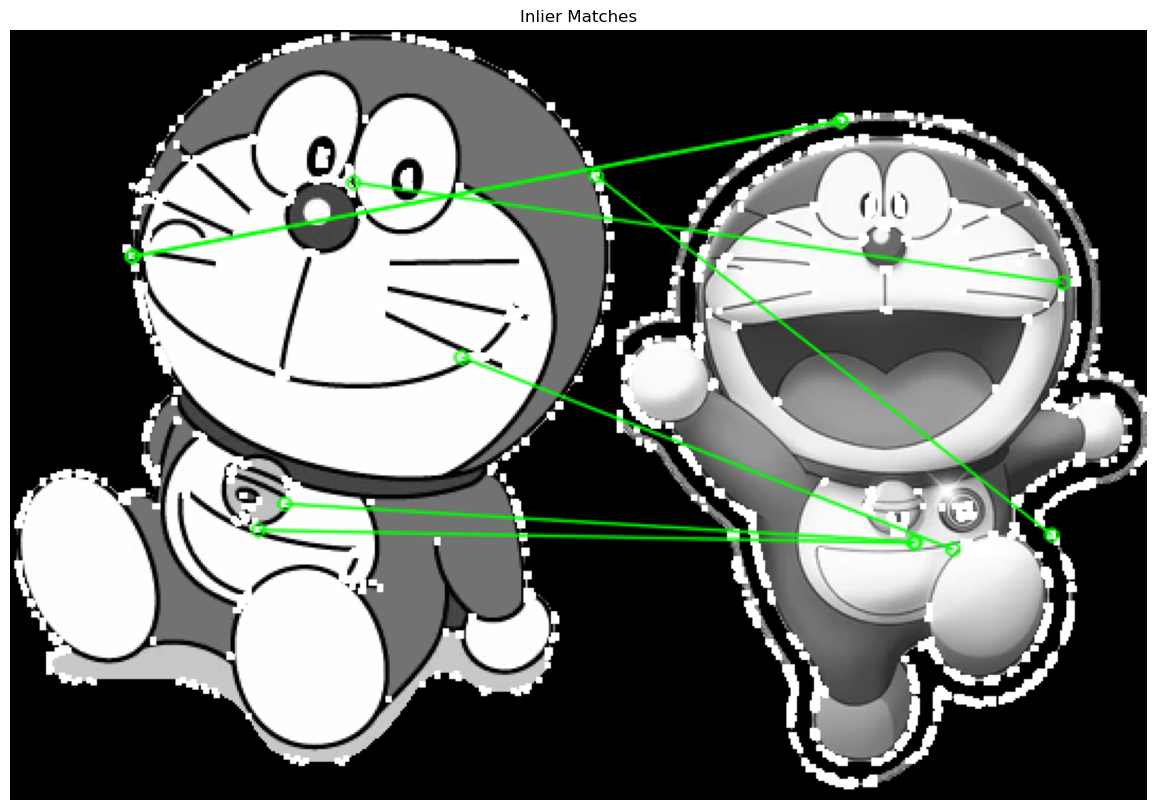

In [6]:
# Apply RANSAC for Feature Matching

# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography using RANSAC
homography, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

# Use the homography matrix to transform the points from the first image to the second
height, width = image2.shape
image1_transformed = cv2.warpPerspective(image1, homography, (width, height))

# Display the transformed image
plt.figure(figsize=(10, 5))
plt.title('Transformed Image 1')
plt.imshow(image1_transformed, cmap='gray')
plt.axis('off')
plt.show()

# Draw only inliers
matches_mask = mask.ravel().tolist()
draw_params = dict(matchColor=(0, 255, 0),  # draw matches in green color
                   singlePointColor=None,
                   matchesMask=matches_mask,  # draw only inliers
                   flags=2)

image_inliers = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None, **draw_params)

# Display the inliers
plt.figure(figsize=(15, 10))
plt.title('Inlier Matches')
plt.imshow(image_inliers)
plt.axis('off')
plt.show()

# Estimate Transformation Matrix
Estimate the transformation matrix between the matched keypoints using the RANSAC algorithm.

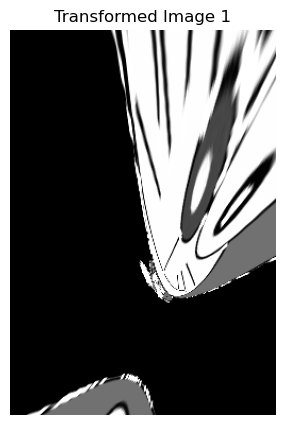

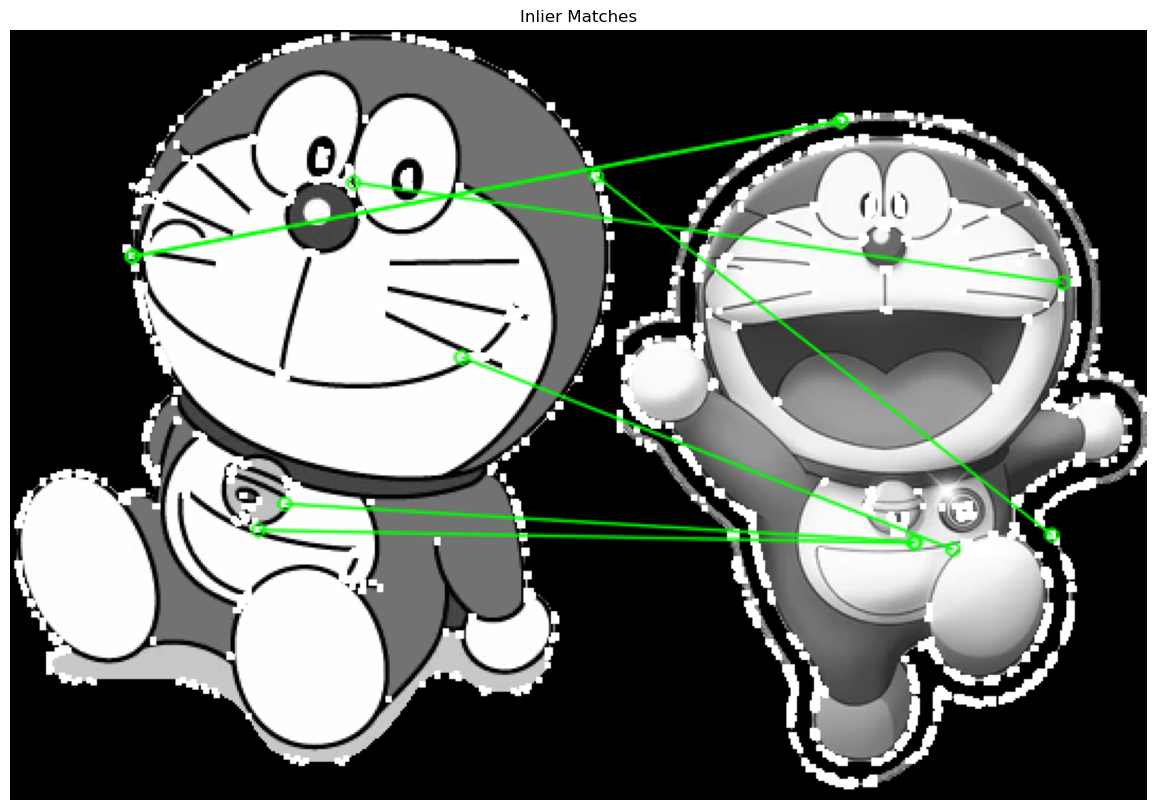

In [7]:
# Estimate Transformation Matrix

# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography using RANSAC
homography, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

# Use the homography matrix to transform the points from the first image to the second
height, width = image2.shape
image1_transformed = cv2.warpPerspective(image1, homography, (width, height))

# Display the transformed image
plt.figure(figsize=(10, 5))
plt.title('Transformed Image 1')
plt.imshow(image1_transformed, cmap='gray')
plt.axis('off')
plt.show()

# Draw only inliers
matches_mask = mask.ravel().tolist()
draw_params = dict(matchColor=(0, 255, 0),  # draw matches in green color
                   singlePointColor=None,
                   matchesMask=matches_mask,  # draw only inliers
                   flags=2)

image_inliers = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None, **draw_params)

# Display the inliers
plt.figure(figsize=(15, 10))
plt.title('Inlier Matches')
plt.imshow(image_inliers)
plt.axis('off')
plt.show()